In [2]:

import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
#from wordcloud import WordCloud

In [59]:
df = pd.read_csv("Scaled-VAD.csv", index_col = 0)


In [60]:
df['Joy'] = df['Joy'].replace(['NoJoy'],'Non-Joy')
print(df.tail())

                                                   Tweet         V         A  \
18221  pengepandatante coastlieberian nontoxickids si...  0.244250 -0.309936   
18222                                          happening  0.354000  0.435269   
18223                 chilling sky 360c observation deck  0.424000 -0.152637   
18224                            saw peonies n lost shit -0.712667 -0.606109   
18225                              shoot kill muthafucka -0.856000 -0.421950   

              D      Joy  
18221 -0.321715  Non-Joy  
18222  0.270564  Non-Joy  
18223 -0.161407  Non-Joy  
18224 -0.749957  Non-Joy  
18225 -0.544749  Non-Joy  


In [61]:
#Just Joy Tweets: These are all joy tweets with only the valence and arousal scores
#9113 examples index from 0 to 9112
joy = df.where(df["Joy"] == "Joy")
joy = joy.dropna(axis=0)
joy = joy.reset_index()
joy = joy.drop(columns = ["D", "Joy", "index"])
print(len(joy))

#Non-Joy Tweets Only
nonjoy = df.where(df["Joy"] == "Non-Joy")
nonjoy = nonjoy.dropna(axis=0)
nonjoy = nonjoy.reset_index()
nonjoy = nonjoy.drop(columns = ["D", "Joy", "index"])
#onjoy = nonjoy.drop(index = 8296)
print(len(nonjoy))

9098
7381


In [62]:
# List of valence/arousal for heatmap
va_ar = []
i = 0
while i < len(joy["V"]):
    va_ar.append([joy["V"][i], joy["A"][i]])
    i+=1
    
    
    

nva_ar = []
i = 0
while i < len(nonjoy["V"]):
    nva_ar.append([nonjoy["V"][i], nonjoy["A"][i]])
    i+=1

a  = va_ar + nva_ar


[[0.3420000000000001, -0.2223152446913767], [0.2702857142857144, -0.275287312580866], [0.3420000000000001, -0.1094299413958442], [0.3763333333333334, -0.151305274374001], [0.453, -0.155922571479311], [0.1853333333333329, -0.340081690641094], [0.6960000000000002, -0.0350559403303143], [0.5212000000000001, -0.0712839637719764], [0.6679999999999999, 0.327650506126798], [0.4150526315789478, -0.2024226789669965], [0.52, -0.0926419226898715], [0.38625, -0.179541822056473], [0.4219999999999999, -0.186467767714438], [0.5994000000000002, -0.1194459243473626], [0.96, 0.9222163026105488], [0.5034545454545454, -0.1530973022715164], [0.5094000000000001, -0.1671816728822588], [0.389, -0.1761676434025929], [0.5349999999999997, -0.1402237613212573], [0.0708800000000002, -0.4081619605753861], [0.537857142857143, -0.153816881041175], [0.4698571428571427, -0.1617322475074206], [0.911, 0.4571124134256792], [0.476952380952381, -0.1873049699368293], [0.0035, -0.2458710708577517], [0.5846666666666669, -0.090

In [63]:
vaar = pd.DataFrame(va_ar, columns = ["V", "A"])
corr = vaar.corr()
print()
print("Joy Tweet Correlation Valence vs. Arousal")
print(corr)

nvaar = pd.DataFrame(nva_ar, columns = ["V", "A"])
ncorr = nvaar.corr()
print()
print("Non-Joy Tweet Correlation Valence vs. Arousal")
print(ncorr)

al= pd.DataFrame(a, columns = ["V", "A"])
al_corr = al.corr()
print()
print("All Tweets Correlation Valence vs. Arousal")
print(al_corr)


Joy Tweet Correlation Valence vs. Arousal
          V         A
V  1.000000  0.799502
A  0.799502  1.000000

Non-Joy Tweet Correlation Valence vs. Arousal
          V         A
V  1.000000  0.623362
A  0.623362  1.000000

All Tweets Correlation Valence vs. Arousal
          V         A
V  1.000000  0.662884
A  0.662884  1.000000


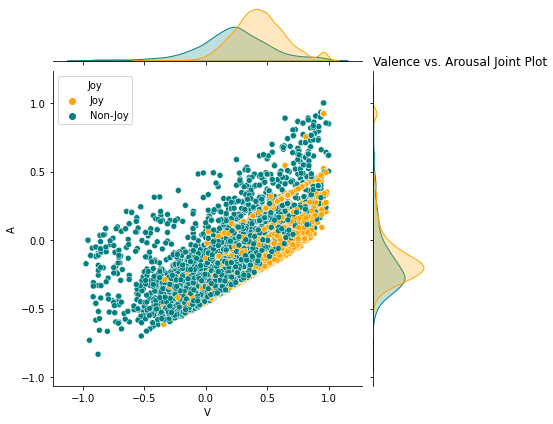

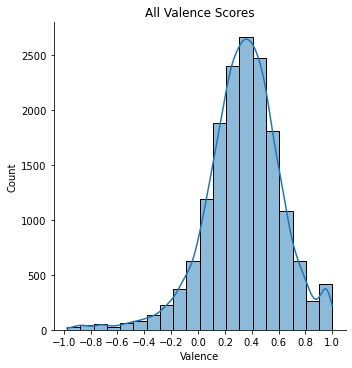

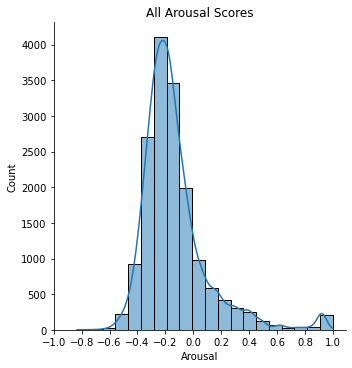

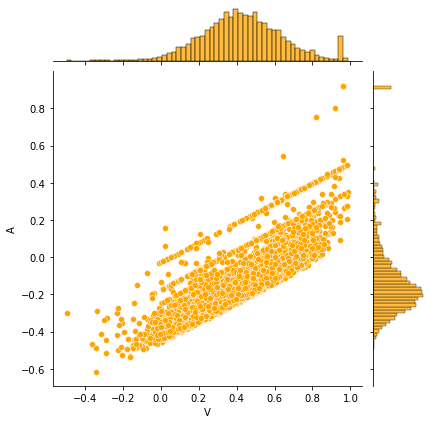

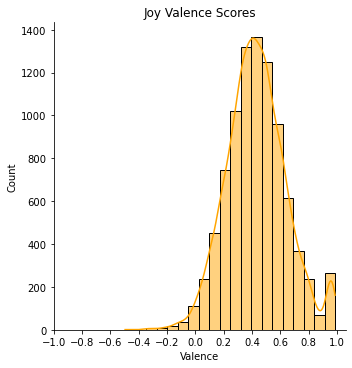

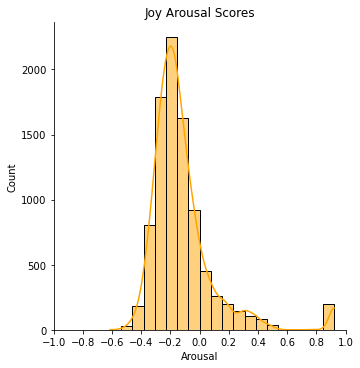

In [80]:
#Joint Plot from seaborn 
#Distribution plot



sns.jointplot(data=df, x="V", y="A", hue="Joy", palette = ["orange", "teal"]) #specify the hue
plt.title("Valence vs. Arousal Joint Plot", loc='left')
plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.show()



sns.displot(df["V"], kde=True, bins=20)
plt.title("All Valence Scores")
plt.xlabel("Valence")
plt.xticks([-1, -.8, -.6, -.4, -.2, 0, .2, .4, .6, .8, 1])
plt.show()


sns.displot(df["A"], kde=True, bins=20)
plt.title("All Arousal Scores")
plt.xlabel("Arousal")
plt.xticks([-1, -.8, -.6, -.4, -.2, 0, .2, .4, .6, .8, 1])
plt.show()

sns.jointplot(data=joy, x="V", y="A", color = "orange")
plt.xlabel("Valence")
plt.ylabel("Arousal")
plt.show()


sns.displot(joy["V"], kde=True, bins=20, color = "orange")
plt.title("Joy Valence Scores")
plt.xlabel("Valence")
plt.xticks([-1, -.8, -.6, -.4, -.2, 0, .2, .4, .6, .8, 1])
plt.show()

sns.displot(joy["A"], kde=True, bins=20, color = "orange")
plt.title("Joy Arousal Scores")
plt.xlabel("Arousal")
plt.xticks([-1, -.8, -.6, -.4, -.2, 0, .2, .4, .6, .8, 1])
plt.show()

In [65]:
#Valence/Arousal Averages Across Joy Tweets
avg_va = str(joy["V"].mean())
avg_ar = str(joy["A"].mean())
print("Averages Across Joy Tweets~ " + "Valence: " + avg_va + "; Arousal: "+  avg_ar)

#Valence/Arousal Averages Across Non-Joy Tweets
avg_va_nonjoy = str(nonjoy["V"].mean())
avg_ar_nonjoy = str(nonjoy["A"].mean())
print("Averages Across Non-Joy Tweets~ " + "Valence: " + avg_va_nonjoy + "; Arousal: "+  avg_ar_nonjoy)

Averages Across Joy Tweets~ Valence: 0.43165960016882277; Arousal: -0.12165806272575878
Averages Across Non-Joy Tweets~ Valence: 0.21845327218213278; Arousal: -0.15222979603365122


In [ ]:
#Look into the three high outliers of Joy Tweets
#Look into the negative valence & arousal joy tweets